Objectives:
    
- Does local economic parameters (GDP, etc) have a larger impact than AID? 
- Is it even about money? Or is it more due to other factors compare with data on arable land, water resources, etc. 
- Suggestions on how to better target money to help food insecurity


In [2]:
!pip install xlrd
#installing prereqs for pandas xlsx support

    100% |████████████████████████████████| 112kB 2.0MB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/resources/data/project/Aid_aggregate_data.xlsx')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,3.637000e+02,3.575000e+02,3.515000e+02,3.455000e+02,3.397000e+02,3.339000e+02,...,1.022000e+02,9.820000e+01,9.410000e+01,9.020000e+01,8.640000e+01,8.280000e+01,7.930000e+01,7.610000e+01,7.320000e+01,7.040000e+01
1,Afghanistan,AFG,Net official development assistance and offici...,DT.ODA.ALLD.CD,1.718000e+07,3.467000e+07,1.693000e+07,3.667000e+07,4.617000e+07,5.393000e+07,...,4.964910e+09,4.875860e+09,6.234000e+09,6.471680e+09,6.867050e+09,6.668030e+09,5.152540e+09,4.945130e+09,4.239180e+09,NaN
2,Afghanistan,AFG,"Prevalence of underweight, weight for age (% o...",SH.STA.MALN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.990000e+01,2.770000e+01,2.600000e+01,2.470000e+01,2.430000e+01,2.440000e+01,2.510000e+01,2.600000e+01,2.680000e+01,NaN
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,5.977733e+01,5.987815e+01,5.849287e+01,7.878276e+01,8.220844e+01,1.012905e+02,...,3.698358e+02,3.733611e+02,4.458933e+02,5.533003e+02,6.035370e+02,6.690091e+02,6.317450e+02,6.120697e+02,5.840259e+02,5.617787e+02
5,Afghanistan,AFG,Crop production index (2004-2006 = 100),AG.PRD.CROP.XD,NaN,6.772000e+01,6.925000e+01,6.760000e+01,7.352000e+01,7.610000e+01,...,1.220900e+02,1.033000e+02,1.320800e+02,1.266100e+02,1.145800e+02,1.353700e+02,1.349800e+02,1.425100e+02,NaN,NaN
6,Afghanistan,AFG,Poverty gap at $1.90 a day (2011 PPP) (%),SI.POV.GAPS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,NaN,5.420000e+01,5.486000e+01,5.483000e+01,5.932000e+01,6.216000e+01,...,1.093400e+02,1.008600e+02,1.175000e+02,1.166700e+02,1.115100e+02,1.229200e+02,1.201100e+02,1.246900e+02,NaN,NaN
8,Afghanistan,AFG,"Foreign direct investment, net (BoP, current US$)",BN.KLT.DINV.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-4.603374e+07,-1.975127e+08,-5.420055e+07,-5.762084e+07,-4.722679e+07,-3.763859e+07,-4.351017e+07,-1.631026e+08,NaN
9,Afghanistan,AFG,Depth of the food deficit (kilocalories per pe...,SN.ITK.DFCT,NaN,NaN,NaN,NaN,NaN,NaN,...,2.010000e+02,1.840000e+02,1.680000e+02,1.580000e+02,1.510000e+02,1.490000e+02,1.510000e+02,1.580000e+02,1.660000e+02,1.730000e+02


In [13]:
#show unique indicators

df['Indicator Name'].unique()


array(['Mortality rate, under-5 (per 1,000 live births)',
       'Net official development assistance and official aid received (current US$)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Prevalence of undernourishment (% of population)',
       'GDP per capita (current US$)',
       'Crop production index (2004-2006 = 100)',
       'Poverty gap at $1.90 a day (2011 PPP) (%)',
       'Food production index (2004-2006 = 100)',
       'Foreign direct investment, net (BoP, current US$)',
       'Depth of the food deficit (kilocalories per person per day)',
       'Arable land (% of land area)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Improved water source (% of population with access)',
       'Access to electricity (% of population)',
       'Debt forgiveness grants (current US$)',
       'Net ODA received per capita (current US$)', 'Population, total'], dtype=object)

# Investigating Per Capita Aid

In [122]:
#Exploring ODA per capita data

assistance = df.loc[df['Indicator Code'] == 'DT.ODA.ODAT.PC.ZS']
assistance = assistance.set_index('Country Name')
assistance = assistance.loc[:,"1960":'2015'] #data only recorded up till 2015
assistance = assistance.fillna(0)
assistance

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.909663,3.782142,1.811496,3.846253,4.744455,5.426419,4.960437,3.914147,2.757360,2.510496,...,114.391864,186.532998,178.641990,222.608424,224.686403,231.146881,217.221198,162.378377,150.959368,125.655618
Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,108.282343,103.915230,123.787286,121.973589,125.323504,130.621180,120.383354,93.254377,97.324292,116.037648
Algeria,31.914928,38.396792,34.014097,23.521635,18.529648,11.580784,9.777919,8.060387,8.702462,9.277852,...,7.125366,11.516301,9.317939,8.526252,5.572070,5.251285,3.921647,5.305885,4.109087,2.213359
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,-0.008860,4.093499,0.000000,0.005016,0.000000,0.178937,0.453265,2.833985,0.001533,-0.016560,...,8.070120,11.795109,16.960011,10.595778,10.062847,7.966616,9.707067,10.983009,8.743905,13.643197
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,36.322964,54.606537,65.637233,45.522061,207.688488,161.096543,21.596040,16.253680,25.790139,14.911482
Arab World,9.535962,10.247095,9.511345,8.550949,8.053282,6.273229,6.300799,4.041299,4.320274,4.141441,...,54.239562,57.463898,66.862908,41.144799,34.547384,37.414728,40.490776,58.943063,57.159437,50.666052
Argentina,1.386095,1.392636,1.869626,1.748232,0.784370,-2.791317,-0.428595,0.945832,1.750549,1.079387,...,2.791534,2.146848,2.971592,2.786070,3.117852,2.284857,4.222655,0.816410,1.135139,-0.536416


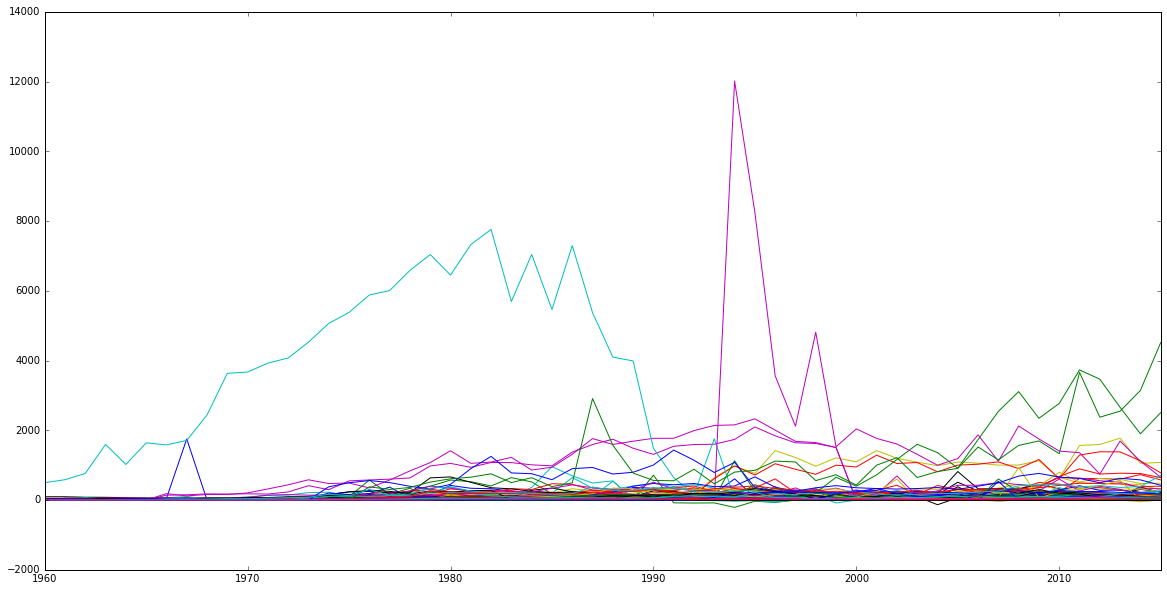

In [123]:
%matplotlib inline
assistance.T.plot(legend=None, figsize=(20,10))

In [236]:
#using this function to normalize dataframes by mean and standard deviation
def normalize_df(df):
    df = df.sub(df.mean(axis=1), axis=0)
    df = df.div(df.std(axis=1), axis=0)
    df = df.fillna(0)
    return df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.590875,-0.564313,-0.592268,-0.563403,-0.550662,-0.540987,-0.547598,-0.562440,-0.578850,-0.582352,...,1.004775,2.028155,1.916214,2.539913,2.569391,2.661038,2.463491,1.685502,1.523514,1.164560
Albania,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,-0.850112,...,1.174089,1.092451,1.463934,1.430029,1.492652,1.591685,1.400302,0.893160,0.969242,1.319065
Algeria,3.153234,4.089503,3.456448,1.940870,1.219806,0.216081,-0.044332,-0.292420,-0.199676,-0.116564,...,-0.427479,0.206767,-0.110774,-0.225129,-0.651844,-0.698179,-0.890238,-0.690293,-0.863163,-1.136991
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,-1.005355,-0.651880,-1.004592,-1.004159,-1.004592,-0.989174,-0.965537,-0.760405,-1.004460,-1.006019,...,-0.309239,0.011721,0.456749,-0.091618,-0.137538,-0.318157,-0.168193,-0.058253,-0.251183,0.170959
Antigua and Barbuda,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,-1.088948,...,-0.340745,0.035872,0.263089,-0.151256,3.189149,2.229419,-0.644099,-0.754144,-0.557706,-0.781792
Arab World,-1.128982,-1.092146,-1.130257,-1.180004,-1.205782,-1.297986,-1.296558,-1.413597,-1.399147,-1.408410,...,1.186597,1.353613,1.840467,0.508308,0.166572,0.315096,0.474431,1.430231,1.337842,1.001494
Argentina,-0.468818,-0.465482,-0.222213,-0.284125,-0.775703,-2.599333,-1.394325,-0.693356,-0.282944,-0.625242,...,0.247968,-0.080828,0.339799,0.245181,0.414392,-0.010442,0.977851,-0.759362,-0.596808,-1.449315


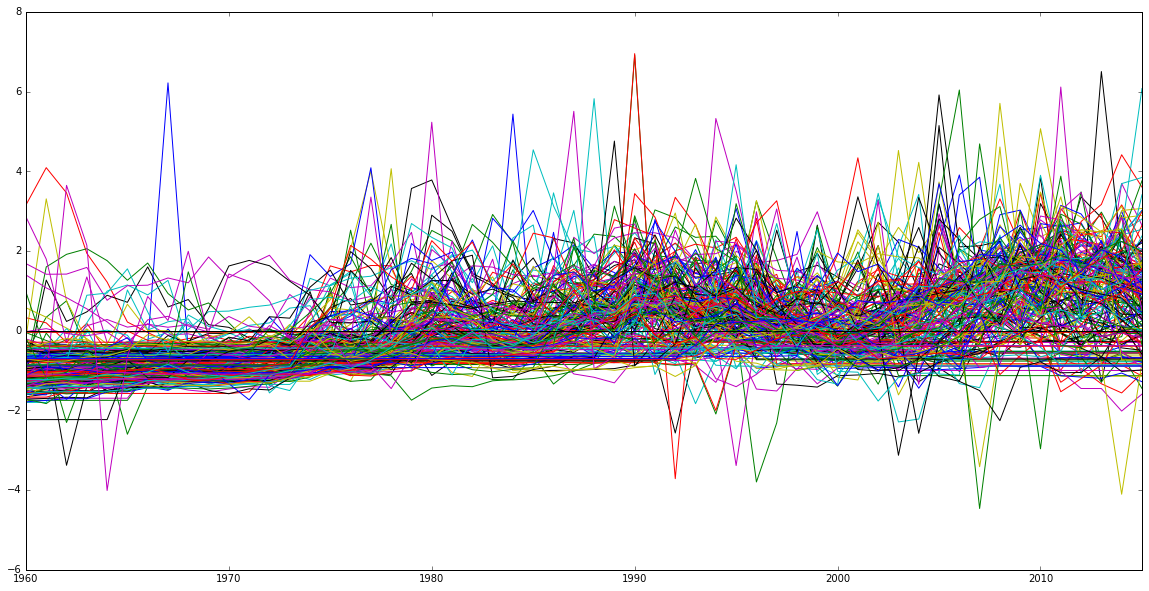

In [237]:
#normalize ODA

assistance_normalized = normalize_df(assistance)
assistance_normalized.T.plot(legend=None, figsize=(20,10))
assistance_normalized

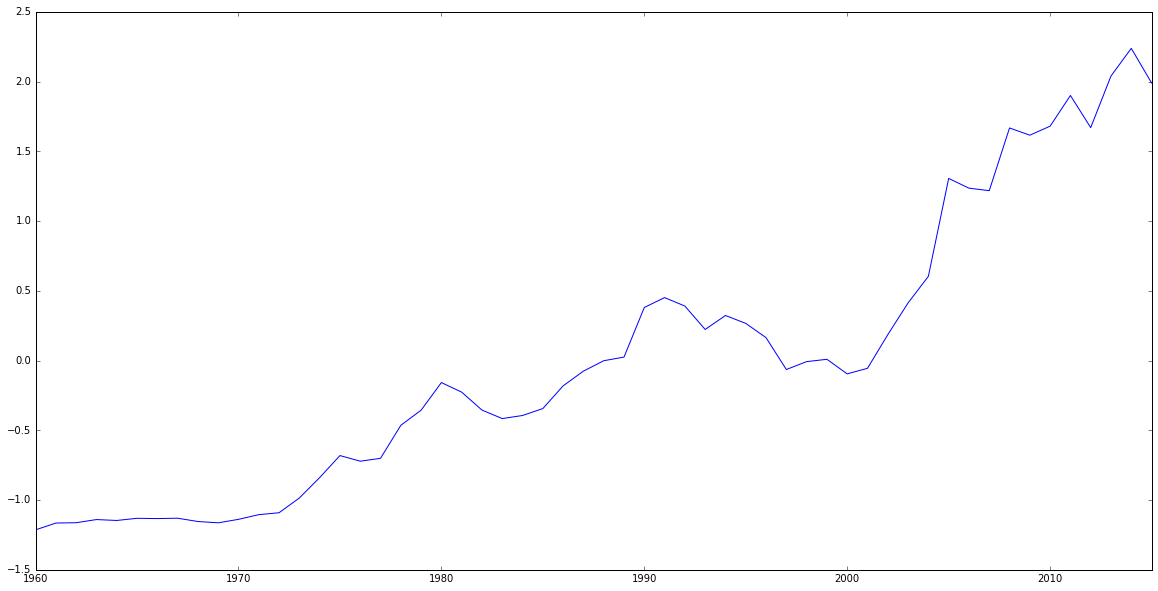

In [313]:
#Show the normalized ODA trend of the world overall

assistance_normalized.loc["World", :].T.plot(legend=None, figsize=(20,10))

In [314]:
#showing autocorrelations of ODA from year 1 to 19 - generally positive, means ODA is steadily increasing

for i in range(1,20,2):
    print('lag', i, ': ', pd.Series(assistance_normalized.loc["World", :]).autocorr(lag=i))

lag 1 :  0.985885402185
lag 3 :  0.95844805677
lag 5 :  0.906770158581
lag 7 :  0.845270915179
lag 9 :  0.805288176936
lag 11 :  0.776241568038
lag 13 :  0.774668158115
lag 15 :  0.816179738322
lag 17 :  0.837955442086
lag 19 :  0.85348717384


# Measuring Food Insecurity

In [250]:
#exploratory analysis for malnourishment, year 1991-2015, normalized

malnourishment = df.loc[df['Indicator Name'] == 'Prevalence of undernourishment (% of population)']
malnourishment = malnourishment.set_index('Country Name')
malnourishment = malnourishment.loc[:, '1991':'2015']
malnourishment = malnourishment.dropna()
malnourishment_normalized = normalize_df(malnourishment)
malnourishment


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,29.500000,35.600000,39.200000,43.300000,45.400000,45.600000,45.000000,44.000000,43.800000,45.200000,...,32.300000,29.900000,27.700000,26.000000,24.700000,24.300000,24.400000,25.100000,26.000000,26.800000
Algeria,7.700000,7.400000,7.100000,7.200000,7.700000,8.400000,8.900000,9.200000,9.100000,8.700000,...,6.800000,6.400000,6.100000,5.600000,5.100000,5.000000,5.000000,5.000000,5.000000,5.000000
Angola,63.500000,64.500000,64.600000,64.400000,62.200000,59.500000,56.800000,54.800000,53.100000,51.100000,...,31.300000,28.600000,25.800000,23.100000,20.700000,18.900000,17.500000,16.500000,15.300000,14.200000
Arab World,8.349779,8.664450,8.919329,9.529983,9.843646,10.107807,10.303319,10.426093,10.353169,10.159544,...,9.930892,9.802237,9.676860,9.480407,9.295102,9.134183,9.015908,8.963211,8.939761,8.924627
Argentina,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Armenia,27.300000,27.300000,27.300000,27.300000,22.700000,19.600000,17.000000,17.400000,19.000000,21.400000,...,8.200000,6.700000,6.100000,6.100000,6.500000,6.800000,6.800000,6.700000,6.300000,5.800000
Azerbaijan,23.600000,23.600000,23.600000,23.600000,25.400000,27.400000,27.900000,28.500000,26.500000,22.500000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Bangladesh,32.800000,33.200000,34.700000,36.300000,36.900000,36.100000,34.100000,30.800000,26.900000,23.100000,...,16.800000,16.900000,17.000000,17.200000,17.200000,17.300000,17.300000,17.200000,16.900000,16.400000
Barbados,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,6.700000,6.300000,5.300000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [251]:
# Autocorrelations for each country with lag=5
print(malnourishment_normalized.apply(lambda x: x.autocorr(lag=5), axis=1).to_string())

Country Name
Afghanistan                                             4.840727e-01
Algeria                                                 5.478310e-01
Angola                                                  9.707230e-01
Arab World                                             -1.636094e-01
Argentina                                                        NaN
Armenia                                                 6.278115e-01
Azerbaijan                                              6.369962e-01
Bangladesh                                              6.867830e-01
Barbados                                               -2.687750e-01
Belize                                                  3.880979e-01
Benin                                                   9.595931e-01
Bolivia                                                 9.295466e-01
Botswana                                                7.068022e-02
Brazil                                                  7.957490e-01
Brunei Darussalam    

In [245]:
#exploratory analysis for calorie deficit

cal_deficit = df.loc[df['Indicator Name'] == 'Depth of the food deficit (kilocalories per person per day)']
cal_deficit = cal_deficit.set_index('Country Name')
cal_deficit = cal_deficit.loc[:, '1992':'2015']
cal_deficit = cal_deficit.dropna()
cal_deficit_normalized = normalize_df(cal_deficit)
print(cal_deficit_normalized.apply(lambda x: x.autocorr(lag=5), axis=1).to_string())

Country Name
Afghanistan                                             0.501611
Algeria                                                 0.404393
Angola                                                  0.972083
Arab World                                             -0.330329
Argentina                                              -0.281031
Armenia                                                 0.528792
Azerbaijan                                              0.660818
Bangladesh                                              0.657519
Barbados                                               -0.076683
Belize                                                  0.224803
Benin                                                   0.953573
Bolivia                                                 0.896454
Botswana                                                0.041847
Brazil                                                  0.859108
Brunei Darussalam                                      -0.565984
Burkina Faso

# Effects of Aid on Food Insecurity

In [303]:
#Function used to generate temporal correlation with the specified lag
#data x and y must be PD series

def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag), method="spearman")


In [316]:
#Show temporal correlation of malnourishments vs ODA per capita

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['World', :],
                                                          assistance_normalized.loc['World', "1991":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.735422384706
lag: 3 Temporal Correlation: -0.700396151416
lag: 5 Temporal Correlation: -0.615964553959
lag: 7 Temporal Correlation: -0.495347491732
lag: 9 Temporal Correlation: -0.250738554046


In [317]:
#Temporal correlations lag from 1 to 9 of Calorie deficits vs ODA per capita 

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(cal_deficit_normalized.loc['World', :],
                                                          assistance_normalized.loc['World', "1992":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.779644268775
lag: 3 Temporal Correlation: -0.749350649351
lag: 5 Temporal Correlation: -0.654385964912
lag: 7 Temporal Correlation: -0.578431372549
lag: 9 Temporal Correlation: -0.328571428571


## By Region

In [321]:
#Show temporal correlation of malnourishments vs ODA per capita, for MENA region 

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Middle East & North Africa (excluding high income)', :],
                                                          assistance_normalized.loc['Middle East & North Africa (excluding high income)', "1992":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.128458498024
lag: 3 Temporal Correlation: -0.524675324675
lag: 5 Temporal Correlation: -0.863157894737
lag: 7 Temporal Correlation: -0.786764705882
lag: 9 Temporal Correlation: -0.428571428571


In [322]:
#Show temporal correlation of malnourishments vs ODA per capita, for Sub-saharan Africa

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Sub-Saharan Africa (excluding high income)', :],
                                                          assistance_normalized.loc['Sub-Saharan Africa (excluding high income)', "1991":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.700869565217
lag: 3 Temporal Correlation: -0.663466967815
lag: 5 Temporal Correlation: -0.56992481203
lag: 7 Temporal Correlation: -0.426212590299
lag: 9 Temporal Correlation: -0.191176470588


In [323]:
#Show temporal correlation of malnourishments vs ODA per capita, for south asia

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['South Asia (IDA & IBRD)', :],
                                                          assistance_normalized.loc['South Asia (IDA & IBRD)', "1991":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.533043478261
lag: 3 Temporal Correlation: -0.521174477696
lag: 5 Temporal Correlation: -0.612030075188
lag: 7 Temporal Correlation: -0.692466460268
lag: 9 Temporal Correlation: -0.305882352941


In [327]:
#Show temporal correlation of malnourishments vs ODA per capita, for Latin America and the Caribbean

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Latin America & the Caribbean (IDA & IBRD countries)', :],
                                                          assistance_normalized.loc['Latin America & the Caribbean (IDA & IBRD countries)', "1991":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.481739130435
lag: 3 Temporal Correlation: -0.361942405421
lag: 5 Temporal Correlation: -0.154887218045
lag: 7 Temporal Correlation: 0.15995872033
lag: 9 Temporal Correlation: 0.397058823529


## By Income

In [373]:
#Show temporal correlation of malnourishments vs ODA per capita, for various income levels


print('\n', 'Low income', '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Low income', :],
                                                          assistance_normalized.loc['Low income', "1991":"2015"],
                                                          lag=lag))
print('\n', 'Lower middle income', '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Lower middle income', :],
                                                          assistance_normalized.loc['Lower middle income', "1991":"2015"],
                                                          lag=lag))
print('\n', 'Middle income', '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Middle income', :],
                                                          assistance_normalized.loc['Middle income', "1991":"2015"],
                                                          lag=lag))
print('\n', 'Heavily indebted poor countries (HIPC)', '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['Heavily indebted poor countries (HIPC)', :],
                                                          assistance_normalized.loc['Heavily indebted poor countries (HIPC)', "1991":"2015"],
                                                          lag=lag))
    


 Low income 

lag: 1 Temporal Correlation: -0.761739130435
lag: 3 Temporal Correlation: -0.697346132129
lag: 5 Temporal Correlation: -0.607518796992
lag: 7 Temporal Correlation: -0.461300309598
lag: 9 Temporal Correlation: -0.232352941176

 Lower middle income 

lag: 1 Temporal Correlation: -0.554782608696
lag: 3 Temporal Correlation: -0.474872953134
lag: 5 Temporal Correlation: -0.424060150376
lag: 7 Temporal Correlation: -0.261093911249
lag: 9 Temporal Correlation: 0.0794117647059

 Middle income 

lag: 1 Temporal Correlation: -0.607826086957
lag: 3 Temporal Correlation: -0.533596837945
lag: 5 Temporal Correlation: -0.446616541353
lag: 7 Temporal Correlation: -0.333333333333
lag: 9 Temporal Correlation: 0.00588235294118

 Heavily indebted poor countries (HIPC) 

lag: 1 Temporal Correlation: -0.732173913043
lag: 3 Temporal Correlation: -0.699604743083
lag: 5 Temporal Correlation: -0.616541353383
lag: 7 Temporal Correlation: -0.473684210526
lag: 9 Temporal Correlation: -0.25


# Effect of Economy on Food Insecurity

In [358]:
#exploratory analysis for GDP growth from 1961 to 2015, then normalized

gdp = df.loc[df['Indicator Name'] == 'GDP per capita (current US$)']
gdp = gdp.set_index('Country Name')
gdp = gdp.loc[:, '1990':'2015']
gdp = gdp.dropna()
gdp_growth = gdp.pct_change(axis=1).loc[:, '1961':'2015']
gdp_growth = normalize_df(gdp_growth)
gdp_growth

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,-2.112216,-1.807597,2.372747,1.942559,0.449306,1.001220,-1.470915,0.171179,0.602461,...,0.001857,0.338484,0.391054,-0.627528,-0.425607,-0.093677,-0.567751,-0.260089,-0.270826,-0.916996
Algeria,0.0,-2.164592,-0.046339,-0.101675,-1.367450,-0.478111,0.497344,-0.155568,-0.325445,-0.257180,...,0.586970,0.712965,1.477108,-1.683312,0.836244,1.273832,-0.056205,-0.340007,-0.225967,-1.913177
Angola,0.0,0.290724,-2.466341,-0.759617,-1.349691,0.415192,1.364604,-0.412330,-1.060366,-0.645851,...,1.275638,1.151129,0.951175,-0.886370,-0.161450,0.468664,-0.101996,-0.196970,-0.445541,-1.195990
Antigua and Barbuda,0.0,0.173026,-0.167211,0.346089,0.790738,-1.316632,0.695716,0.277416,0.212513,-0.032206,...,1.579742,1.599905,0.045887,-2.531125,-1.706219,-0.796472,0.426802,-0.986545,0.443453,0.415054
Arab World,0.0,-0.952001,-0.004788,-0.679787,-0.553688,-0.104036,0.269233,-0.149583,-1.089559,0.135279,...,1.058443,0.865062,1.869212,-2.106393,0.951975,1.070217,0.181503,-0.400513,-0.516164,-1.904891
Argentina,0.0,1.284446,0.600214,-0.259952,0.007710,-0.418976,-0.152081,-0.041838,-0.319307,-0.684015,...,0.439612,0.775149,0.882185,-0.818540,0.956315,0.850790,-0.269441,-0.364121,-0.654625,0.142624
Armenia,0.0,-0.894464,-2.538737,-0.667693,0.184590,0.284840,0.092312,-0.272780,0.420576,-0.588703,...,1.238927,2.018422,1.044764,-1.877177,-0.069911,0.045000,-0.236406,-0.245520,-0.266291,-1.013094
Australia,0.0,-0.161430,-0.572679,-0.897018,-0.248461,0.647119,0.212925,0.184300,-1.269687,-0.786839,...,0.083989,0.724683,1.395828,-1.677642,1.413841,1.293853,0.307279,-0.442237,-1.177638,-1.253904
Austria,0.0,0.013574,0.848418,-0.703992,0.355395,1.636903,-0.537826,-1.489351,-0.090577,-0.422909,...,0.270777,1.307442,0.770373,-1.146219,-0.582061,0.691494,-0.949847,0.136361,-0.177055,-1.981732


In [340]:
#Temporal Correlations for Malnourishments and normalized GDP growth

for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc['World', :],
                                                          gdp_growth.loc['World', "1991":"2015"],
                                                          lag=lag))

lag: 1 Temporal Correlation: -0.119234161781
lag: 3 Temporal Correlation: -0.274166370813
lag: 5 Temporal Correlation: -0.343373883381
lag: 7 Temporal Correlation: -0.511893545735
lag: 9 Temporal Correlation: -0.268437746097


## By Region

In [356]:
#Temporal Correlations for Malnourishments and normalized GDP growth, for various regions

region = 'Middle East & North Africa'
print('\n', region, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[region, :],
                                                          gdp_growth.loc[region, "1992":"2015"],
                                                          lag=lag))
    
region = 'Sub-Saharan Africa (excluding high income)'
print('\n', region, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[region, :],
                                                          gdp_growth.loc[region, "1992":"2015"],
                                                          lag=lag))
    
region = 'South Asia (IDA & IBRD)'
print('\n', region, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[region, :],
                                                          gdp_growth.loc[region, "1992":"2015"],
                                                          lag=lag))

region = 'Latin America & Caribbean (excluding high income)'
print('\n', region, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[region, :],
                                                          gdp_growth.loc[region, "1992":"2015"],
                                                          lag=lag))


 Middle East & North Africa 

lag: 1 Temporal Correlation: 0.192687747036
lag: 3 Temporal Correlation: -0.207792207792
lag: 5 Temporal Correlation: -0.589473684211
lag: 7 Temporal Correlation: -0.625
lag: 9 Temporal Correlation: -0.410714285714

 Sub-Saharan Africa (excluding high income) 

lag: 1 Temporal Correlation: -0.416996047431
lag: 3 Temporal Correlation: -0.490909090909
lag: 5 Temporal Correlation: -0.542105263158
lag: 7 Temporal Correlation: -0.649509803922
lag: 9 Temporal Correlation: -0.625

 South Asia (IDA & IBRD) 

lag: 1 Temporal Correlation: 0.0454545454545
lag: 3 Temporal Correlation: -0.212987012987
lag: 5 Temporal Correlation: -0.647368421053
lag: 7 Temporal Correlation: -0.411764705882
lag: 9 Temporal Correlation: -0.389285714286

 Latin America & Caribbean (excluding high income) 

lag: 1 Temporal Correlation: -0.144268774704
lag: 3 Temporal Correlation: -0.294805194805
lag: 5 Temporal Correlation: -0.398245614035
lag: 7 Temporal Correlation: -0.450980392157
lag:

## By Income

In [360]:
#Temporal Correlations for Malnourishments and normalized GDP growth, for various income levels 

group = 'Low income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, :],
                                                          gdp_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
    
    
group = 'Lower middle income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, :],
                                                          gdp_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
    
group = 'Middle income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, :],
                                                          gdp_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
    
group = 'Heavily indebted poor countries (HIPC)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, :],
                                                          gdp_growth.loc[group, "1992":"2015"],
                                                          lag=lag))


 Low income 

lag: 1 Temporal Correlation: -0.347826086957
lag: 3 Temporal Correlation: -0.47012987013
lag: 5 Temporal Correlation: -0.533333333333
lag: 7 Temporal Correlation: -0.686274509804
lag: 9 Temporal Correlation: -0.542857142857

 Lower middle income 

lag: 1 Temporal Correlation: -0.200592885375
lag: 3 Temporal Correlation: -0.464935064935
lag: 5 Temporal Correlation: -0.638596491228
lag: 7 Temporal Correlation: -0.708333333333
lag: 9 Temporal Correlation: -0.453571428571

 Middle income 

lag: 1 Temporal Correlation: -0.28557312253
lag: 3 Temporal Correlation: -0.438961038961
lag: 5 Temporal Correlation: -0.619298245614
lag: 7 Temporal Correlation: -0.68137254902
lag: 9 Temporal Correlation: -0.446428571429

 Heavily indebted poor countries (HIPC) 

lag: 1 Temporal Correlation: -0.46837944664
lag: 3 Temporal Correlation: -0.562337662338
lag: 5 Temporal Correlation: -0.636842105263
lag: 7 Temporal Correlation: -0.808823529412
lag: 9 Temporal Correlation: -0.725


# Effect of Arable Land on Food Insecurity

In [382]:
#Exploratory analysis for arable land proportion, the growth is generated by year-on-year basis then normalized

arable_land = df.loc[df['Indicator Name'] == 'Arable land (% of land area)']
arable_land = arable_land.set_index('Country Name')
arable_land = arable_land.loc[:, '1990':'2014']
arable_land = arable_land.dropna()
arable_land_growth = arable_land.pct_change(axis=1).loc[:, '1991':'2014']
arable_land_growth = normalize_df(arable_land_growth)
arable_land_growth

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.116038,0.116038,-1.636341,-2.376620,-0.930166,-0.010327,0.916975,1.626100,-2.044917,0.747861,...,-0.110799,-0.111119,0.116038,0.116038,0.095358,0.116038,0.074673,0.095350,0.012586,-0.173814
Albania,-0.175139,-0.109547,-0.175253,-0.109547,-0.109547,-0.109547,-0.043727,-0.175253,-0.109547,-0.043727,...,-2.737773,3.137631,-0.499730,1.993034,-0.171806,0.950591,-0.352217,-0.286614,-0.232234,-0.201861
Algeria,2.058458,3.519426,-0.547998,-0.870203,0.298221,-0.180855,1.330884,-0.075938,-0.064437,-0.333013,...,0.010395,-0.693362,-0.216653,0.035059,-0.156851,-0.097137,-0.204668,-0.150967,-0.327511,-0.524775
American Samoa,-0.450844,1.268985,-0.450844,-0.450844,1.698943,2.415539,-0.450844,1.268985,-0.092547,-0.450844,...,-0.450844,-0.450844,-1.232585,-0.565500,-0.334640,-0.450844,-0.450844,-0.450844,-0.450844,-0.450844
Andorra,-0.270244,-0.270244,-0.270244,-0.270244,-0.270244,-0.270244,-0.270244,1.460272,0.516354,-0.270244,...,-0.270244,-0.962450,-0.991292,-1.022642,0.516354,1.234553,0.421963,-1.601410,3.334998,-0.866974
Angola,-0.125349,-0.131678,-0.498733,-0.498733,-0.498733,-0.498733,-0.498733,-0.498733,-0.498733,-0.498733,...,-0.498733,-0.498733,0.157517,-0.498733,3.322962,0.042673,2.670477,-0.498733,0.422810,-0.498733
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arab World,0.565424,0.701387,2.927474,-0.568620,0.647911,0.373300,-0.818775,-0.451316,-0.705765,-1.587755,...,0.536758,-1.082200,0.143758,-1.343290,-0.214407,-0.089135,-0.365623,0.119245,0.510005,0.135672
Argentina,-0.394060,-0.394536,-0.395009,-0.392061,-0.393687,-0.394166,-0.393516,-0.397359,-0.395577,-0.394929,...,1.596980,1.306190,0.872279,-1.500163,-1.356606,2.779276,0.129968,0.253271,-0.557422,-0.899977


In [383]:
#Temporal Correlations for Malnourishments and normalized Arable Land Growth, for the World

group = 'World'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))


 World 

lag: 1 Temporal Correlation: -0.31938968971
lag: 3 Temporal Correlation: -0.275602722187
lag: 5 Temporal Correlation: -0.0982421956462
lag: 7 Temporal Correlation: -0.244838823363
lag: 9 Temporal Correlation: -0.398240064966


## By Region

In [387]:
#Temporal Correlations for Malnourishments and normalized Arable Land Growth, for various regions

group = 'Middle East & North Africa (excluding high income)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -', arable_land.loc[group, "2014"],'\n')
    
group = 'Sub-Saharan Africa (excluding high income)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')

    
group = 'South Asia (IDA & IBRD)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')

    
group = 'Latin America & Caribbean (excluding high income)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')



 Middle East & North Africa (excluding high income) 

lag: 1 Temporal Correlation: -0.190287972897
lag: 3 Temporal Correlation: 0.0240601503759
lag: 5 Temporal Correlation: 0.14963880289
lag: 7 Temporal Correlation: -0.25
lag: 9 Temporal Correlation: -0.367032967033

Arable Land Percentage in 2014 - 5.66535216249 


 Sub-Saharan Africa (excluding high income) 

lag: 1 Temporal Correlation: 0.0367024280068
lag: 3 Temporal Correlation: -0.0526315789474
lag: 5 Temporal Correlation: 0.0918472652219
lag: 7 Temporal Correlation: 0.0676470588235
lag: 9 Temporal Correlation: -0.0285714285714

Arable Land Percentage in 2014 - 8.93862922027 


 South Asia (IDA & IBRD) 

lag: 1 Temporal Correlation: -0.194805194805
lag: 3 Temporal Correlation: 0.0721804511278
lag: 5 Temporal Correlation: 0.302373581011
lag: 7 Temporal Correlation: 0.402941176471
lag: 9 Temporal Correlation: 0.257142857143

Arable Land Percentage in 2014 - 43.1215507997 


 Latin America & Caribbean (excluding high income) 

lag:

## By Income

In [388]:
#Temporal Correlations for Malnourishments and normalized Arable Land Growth, for various income levels

group = 'Low income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')

    
group = 'Lower middle income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')

group = 'Middle income'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')

group = 'Heavily indebted poor countries (HIPC)'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2014"],
                                                          arable_land_growth.loc[group, "1992":"2014"],
                                                          lag=lag))
print('\nArable Land Percentage in 2014 -',arable_land.loc[group, "2014"],'\n')



 Low income 

lag: 1 Temporal Correlation: -0.324675324675
lag: 3 Temporal Correlation: -0.476691729323
lag: 5 Temporal Correlation: -0.434468524252
lag: 7 Temporal Correlation: -0.370588235294
lag: 9 Temporal Correlation: -0.516483516484

Arable Land Percentage in 2014 - 9.45756313545 


 Lower middle income 

lag: 1 Temporal Correlation: 0.488424618859
lag: 3 Temporal Correlation: 0.374436090226
lag: 5 Temporal Correlation: 0.574819401445
lag: 7 Temporal Correlation: 0.411764705882
lag: 9 Temporal Correlation: 0.424175824176

Arable Land Percentage in 2014 - 17.3889257628 


 Middle income 

lag: 1 Temporal Correlation: -0.277244494636
lag: 3 Temporal Correlation: -0.285714285714
lag: 5 Temporal Correlation: -0.0794633642931
lag: 7 Temporal Correlation: -0.285294117647
lag: 9 Temporal Correlation: -0.235164835165

Arable Land Percentage in 2014 - 11.4580302957 


 Heavily indebted poor countries (HIPC) 

lag: 1 Temporal Correlation: -0.0739695087521
lag: 3 Temporal Correlation: -0.2

# Effect of Water Access

In [414]:
#Exploratory analysis for Water, growth is calculated then normalized

water = df.loc[df['Indicator Name'] == 'Improved water source (% of population with access)']
water = water.set_index('Country Name')
water = water.loc[:, '1991':'2015']
water = water.dropna()
water_growth = water.pct_change(axis=1).loc[:, '1992':'2015']
water_growth = normalize_df(water_growth)
water_normalized = normalize_df(water)
water_normalized = water_normalized.loc[:, '1992':'2015']


In [420]:
#Temporal Correlations for Malnourishments and normalized water growth, for the world

group = 'World'
print('\n', group, '\n')
for lag in range(1,11,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))


 World 

lag: 1 Temporal Correlation: 0.894164631274
lag: 3 Temporal Correlation: 0.867360941423
lag: 5 Temporal Correlation: 0.857646315719
lag: 7 Temporal Correlation: 0.830469337185
lag: 9 Temporal Correlation: 0.761394405909


In [419]:
#Normalized Water growth for the world

water_growth.loc[group, "1992":"2015"]

1992    1.504779
1993    1.284592
1994    1.896125
1995    0.696469
1996    0.820168
1997    0.643127
1998    0.357352
1999    0.674698
2000    0.671178
2001   -0.076940
2002    0.022440
2003   -0.205678
2004    0.108590
2005   -0.414486
2006    0.053542
2007   -0.514650
2008   -0.566062
2009   -0.407884
2010   -0.338315
2011   -0.667308
2012   -0.700287
2013   -0.691338
2014   -1.137305
2015   -3.012807
Name: Latin America & Caribbean (excluding high income), dtype: float64

In [418]:
#Normalized Malnourishment for the world 

malnourishment_normalized.loc[group, "1992":"2015"]

1992    1.330994
1993    1.305779
1994    1.225907
1995    1.122822
1996    1.041193
1997    0.962036
1998    0.918756
1999    0.804240
2000    0.621177
2001    0.372813
2002    0.104051
2003   -0.111761
2004   -0.339852
2005   -0.540669
2006   -0.668113
2007   -0.802550
2008   -0.908473
2009   -0.958983
2010   -1.001288
2011   -1.072299
2012   -1.148062
2013   -1.208958
2014   -1.257592
2015   -1.297818
Name: Latin America & Caribbean (excluding high income), dtype: float64

In [426]:
#Temporal Correlations for Malnourishments and normalized water growth, for various regions

group = 'Middle East & North Africa (excluding high income)'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'Sub-Saharan Africa (IDA & IBRD countries)'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'South Asia (IDA & IBRD)'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'Latin America & Caribbean (excluding high income)'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')


 Middle East & North Africa (excluding high income) 

lag: 1 Temporal Correlation: -0.173913043478
lag: 3 Temporal Correlation: -0.120779220779
lag: 5 Temporal Correlation: 0.142105263158
lag: 7 Temporal Correlation: 0.470588235294
lag: 9 Temporal Correlation: 0.0964285714286
lag: 11 Temporal Correlation: -0.373626373626
lag: 13 Temporal Correlation: -0.372727272727
lag: 15 Temporal Correlation: -0.1
lag: 17 Temporal Correlation: 0.0357142857143
lag: 19 Temporal Correlation: -0.1

 water 2014 - 92.7036907951 


 Sub-Saharan Africa (IDA & IBRD countries) 

lag: 1 Temporal Correlation: 0.45652173913
lag: 3 Temporal Correlation: 0.338961038961
lag: 5 Temporal Correlation: 0.508771929825
lag: 7 Temporal Correlation: 0.397058823529
lag: 9 Temporal Correlation: 0.278571428571
lag: 11 Temporal Correlation: 0.186813186813
lag: 13 Temporal Correlation: 0.0636363636364
lag: 15 Temporal Correlation: -0.116666666667
lag: 17 Temporal Correlation: -0.357142857143
lag: 19 Temporal Correlation: -0.5


In [427]:
#Temporal Correlations for Malnourishments and normalized water growth, for various income levels

group = 'Low income'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'Lower middle income'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'Middle income'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')

    
group = 'Heavily indebted poor countries (HIPC)'
print('\n', group, '\n')
for lag in range(1,20,2):
    print("lag:", lag, "Temporal Correlation:", crosscorr(malnourishment_normalized.loc[group, "1992":"2015"],
                                                          water_growth.loc[group, "1992":"2015"],
                                                          lag=lag))
print('\n water 2014 -', water.loc[group, "2014"],'\n')


 Low income 

lag: 1 Temporal Correlation: 0.320158102767
lag: 3 Temporal Correlation: 0.136363636364
lag: 5 Temporal Correlation: 0.266666666667
lag: 7 Temporal Correlation: 0.166666666667
lag: 9 Temporal Correlation: 0.0607142857143
lag: 11 Temporal Correlation: -0.0714285714286
lag: 13 Temporal Correlation: -0.281818181818
lag: 15 Temporal Correlation: -0.533333333333
lag: 17 Temporal Correlation: -0.928571428571
lag: 19 Temporal Correlation: -0.8

 water 2014 - 65.0711533308 


 Lower middle income 

lag: 1 Temporal Correlation: 0.744071146245
lag: 3 Temporal Correlation: 0.874025974026
lag: 5 Temporal Correlation: 0.871929824561
lag: 7 Temporal Correlation: 0.830882352941
lag: 9 Temporal Correlation: 0.896428571429
lag: 11 Temporal Correlation: 0.934065934066
lag: 13 Temporal Correlation: 0.945454545455
lag: 15 Temporal Correlation: 0.916666666667
lag: 17 Temporal Correlation: 0.857142857143
lag: 19 Temporal Correlation: 0.7

 water 2014 - 88.5324241931 


 Middle income 

lag: 1